In [102]:
# libraries
import os
import numpy as np 
import sys
sys.path.append(os.path.join(".."))
import cv2
from utils import jimshow
import glob
import matplotlib.pyplot as plt
import pydot
import graphviz
import pandas as pd


# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

In [103]:
#extracting the labels of all pictures 
artists_path = os.path.join("data","training","training")
artists = os.listdir(artists_path)
artists=sorted(artists)

In [104]:
# empty lists 
train_paintings= []
train_paintings_artist=[]

test_paintings= []
test_paintings_artist=[]

In [105]:
#generating a list of paintings 

for artist in artists:
    #train :
    for train_painting in glob.glob(os.path.join("data","training","training",f"{artist}","*.jpg")):
        train_paintings_artist.append(artist)
        train_paintings.append(cv2.imread(train_painting))
    #test :
    for test_painting in glob.glob(os.path.join("data","validation","validation",f"{artist}","*.jpg")):
        test_paintings_artist.append(artist)
        test_paintings.append(cv2.imread(test_painting))
    

In [106]:
#checking if it works
print(train_paintings_artist[0])
print(train_paintings[0][0])

print(test_paintings_artist[0])
print(test_paintings[0][0])

Cezanne
[[154 154 166]
 [143 143 155]
 [123 123 135]
 ...
 [ 61  70  73]
 [ 54  63  66]
 [ 45  54  57]]
Cezanne
[[102 125 127]
 [ 65  88  90]
 [ 42  64  69]
 ...
 [ 83  77  66]
 [ 68  62  51]
 [ 71  65  54]]


In [107]:
#resize image 

trainX_resized=[]
dim= (30,30)

for painting in train_paintings:
    resized=cv2.resize(painting,dim,interpolation=cv2.INTER_AREA)
    #normalize:
    resized = resized.astype("float")/ 255.
    trainX_resized.append(resized)

testX_resized=[]

for painting in test_paintings:
    resized=cv2.resize(painting,dim,interpolation=cv2.INTER_AREA)
    #normalize:
    resized = resized.astype("float")/ 255.
    testX_resized.append(resized)

In [109]:
trainX_len = len(trainX_resized)
testX_len = len(testX_resized)

In [110]:
#changing into an array and reshapig 
trainX_resized=np.array(trainX_resized).reshape(trainX_len,30,30,3)
testX_resized=np.array(testX_resized).reshape(testX_len,30,30,3)

In [111]:
# integers to one-hot vectors so that they are binarized
lb = LabelBinarizer()

trainY = lb.fit_transform(train_paintings_artist) #label

testY = lb.fit_transform(test_paintings_artist)#label 


# Building the model

In [112]:
# initialise model
model = Sequential()

# define CONV => RELU layer
model.add(Conv2D(30, (3, 3), 
                 padding="same", 
                 input_shape=(30, 30, 3)))
model.add(Activation("relu"))

# softmax classifier
model.add(Flatten())
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile the model__

In [113]:
opt = SGD(lr =.01) #from 0.001 to 0.01
model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

__Model summary__

In [114]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 30)        840       
_________________________________________________________________
activation_10 (Activation)   (None, 30, 30, 30)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 27000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                270010    
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 270,850
Trainable params: 270,850
Non-trainable params: 0
_________________________________________________________________


In [115]:
def plot_history(H, epochs):
    # visualize performance
    plt.style.use("fivethirtyeight")
    plt.figure()
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.tight_layout()
    plt.savefig("output/plot_training_loss_accuracy.jpg")

__Plot model__

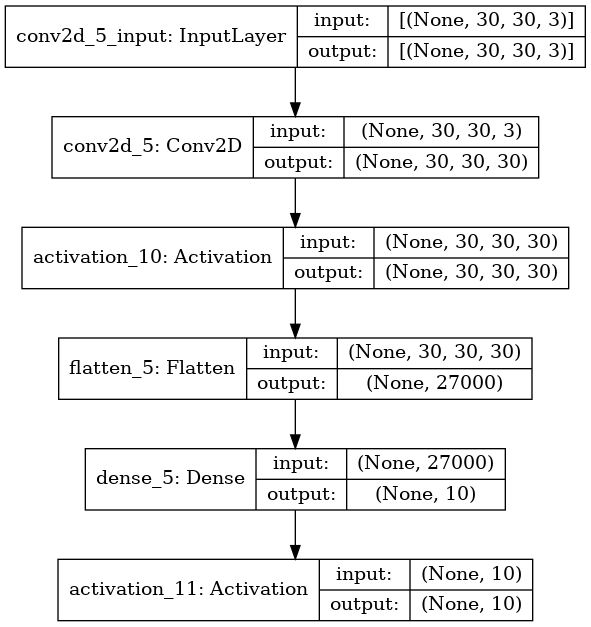

In [116]:
plot_model(model, show_shapes= True, show_layer_names=True)

__Train Model__

In [117]:
H = model.fit(trainX_resized, trainY, 
              validation_data=(testX_resized, testY), 
              batch_size=100,
              epochs=40,
              verbose=1)

Epoch 1/40
40/40 [==============================] - 1s 18ms/step - loss: 2.2952 - accuracy: 0.1259 - val_loss: 2.2356 - val_accuracy: 0.1707
Epoch 2/40
40/40 [==============================] - 1s 14ms/step - loss: 2.1999 - accuracy: 0.1979 - val_loss: 2.1605 - val_accuracy: 0.2202
Epoch 3/40
40/40 [==============================] - 1s 14ms/step - loss: 2.1119 - accuracy: 0.2497 - val_loss: 2.1298 - val_accuracy: 0.2374
Epoch 4/40
40/40 [==============================] - 1s 14ms/step - loss: 2.0742 - accuracy: 0.2672 - val_loss: 2.0883 - val_accuracy: 0.2646
Epoch 5/40
40/40 [==============================] - 1s 14ms/step - loss: 2.0372 - accuracy: 0.2744 - val_loss: 2.0836 - val_accuracy: 0.2606
Epoch 6/40
40/40 [==============================] - 1s 15ms/step - loss: 2.0196 - accuracy: 0.2976 - val_loss: 2.0640 - val_accuracy: 0.2778
Epoch 7/40
40/40 [==============================] - 1s 14ms/step - loss: 1.9964 - accuracy: 0.2899 - val_loss: 2.0962 - val_accuracy: 0.2545
Epoch 8/40
40

In [118]:
predictions = model.predict(testX_resized, batch_size=32)

In [123]:
#generating the classifiation reportand saving its output as a .csv file in the output folder

class_report= pd.DataFrame(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=artists,
                            output_dict =True))

class_report.to_csv("output/class_report.csv",sep=",")

print(class_report)

             Cezanne      Degas    Gauguin     Hassam    Matisse      Monet  \
precision   0.258065   0.390244   0.343750   0.245714   0.423729   0.343750   
recall      0.161616   0.161616   0.444444   0.434343   0.252525   0.333333   
f1-score    0.198758   0.228571   0.387665   0.313869   0.316456   0.338462   
support    99.000000  99.000000  99.000000  99.000000  99.000000  99.000000   

            Pissarro     Renoir    Sargent    VanGogh  accuracy   macro avg  \
precision   0.398230   0.401709   0.476190   0.365217  0.354545    0.364660   
recall      0.454545   0.474747   0.404040   0.424242  0.354545    0.354545   
f1-score    0.424528   0.435185   0.437158   0.392523  0.354545    0.347318   
support    99.000000  99.000000  99.000000  99.000000  0.354545  990.000000   

           weighted avg  
precision      0.364660  
recall         0.354545  
f1-score       0.347318  
support      990.000000  


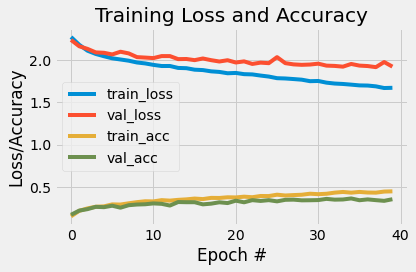

In [122]:
#inspecting model perfomance
plot_history(H,40)